# Week 1: How Do We Assembe Genome?

# 1.1 Exploding Newspapers


1.  **The "Newspaper Problem" Analogy:** The text introduces an analogy where multiple identical newspapers are blown up. To figure out the day's news, one must reconstruct the text by finding and aligning the overlapping, confetti-like snippets, since reassembling a single, complete copy is impossible.

2.  **A Direct Parallel to Genome Assembly:** This problem is a direct analogy for genome assembly. The full newspaper represents the complete genome, while the small, shredded snippets of paper are equivalent to the short DNA fragments that scientists can sequence.

3.  **The Core Obstacle in Sequencing:** Biologists face a major technological limitation: they cannot read a creature's entire genome from beginning to end in one go. They can only sequence much shorter fragments of DNA called "reads."

4.  **The Sequencing Process:** To sequence a genome, researchers take millions of identical DNA copies, break them into random fragments, and then sequence these fragments to generate a massive collection of reads. The original position of each read in the genome is unknown.

5.  **The Main Computational Challenge:** The primary difficulty in modern genomics is not generating these short reads, but rather the massive computational task of assembling them. Scientists must use the overlapping information between these countless reads to piece together the original, complete genome sequence.

# 1.2 The String Reconstruction Problem



1.  **Increased Complexity:** Real-world genome assembly is significantly more complex than the initial "Newspaper Problem" analogy suggests due to several practical complications.

2.  **Complication 1: DNA is Double-Stranded:** A major issue is that DNA has two strands. When a DNA fragment (a "read") is sequenced, there's no way to know upfront if it came from the original strand or its reverse complement, adding ambiguity.

3.  **Complication 2: Sequencing Errors:** Modern sequencing technologies are not perfect and can introduce errors into the reads. These errors can prevent a perfect match between overlapping fragments, complicating assembly.

4.  **Complication 3: Gaps in Coverage:** It's possible that certain regions of the genome may not be captured by any reads at all. These gaps make it impossible to reconstruct the entire genome sequence from the available data.

5.  **Creating a Simplified Model:** To begin tackling this, a simplified computational problem is defined. This model makes unrealistic assumptions: all reads are error-free, come from a single strand, and provide "perfect coverage" (every possible fragment is present).

6.  **The String Reconstruction Problem:** The core task is defined as the "String Reconstruction Problem." This is the inverse of simply breaking a string down; it involves taking a collection of small, scrambled strings (called k-mers) and trying to reassemble the original, full-length string.

7.  **Assembly as Overlapping K-mers:** The basic approach to solving this is to find overlapping k-mers and extend a sequence. For example, a k-mer ending in "ATG" would be followed by a k-mer starting with "TGC."

8.  **The Main Obstacle: Repeats:** The single greatest difficulty in genome assembly arises from **repeats**—identical sequences of nucleotides that appear in multiple places throughout the genome.

9.  **Repeats Cause Ambiguity:** Repeats create branching paths and confusion during assembly. If a repeated k-mer like "ATG" exists, there may be several different valid k-mers that can follow it, making it difficult to "look ahead" and choose the correct path.

10. **The Triazzle® Puzzle Analogy:** The difficulty caused by repeats is compared to a Triazzle® puzzle, where every piece fits with multiple other pieces. This creates many false paths and makes assembly incredibly hard, even with a small number of pieces, mirroring the challenge of assembling a genome from millions of reads.

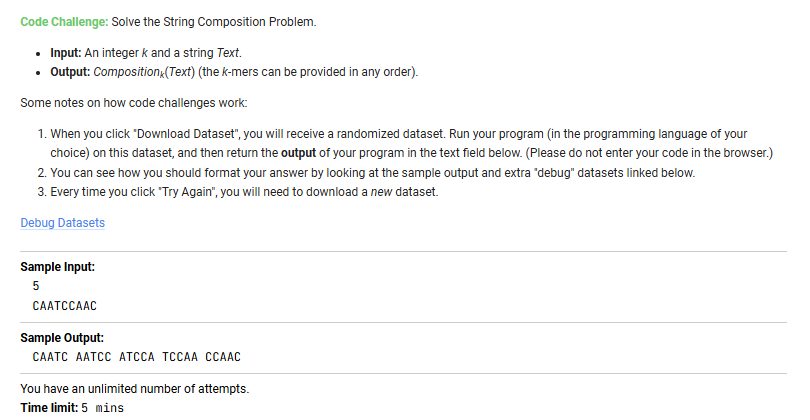

In [4]:
#@title The dataset given in the challenge
Text = "AGTGTGGCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGGTATAGCGTTACTGCATCCAACCTCATCATGCACGAGGGGCCTCTTCTCATAAGATGGCACAGATCAACTAACACAAGCATATAAAATTCCAAATGCATATTGATAGTTGTGTATAGTTCCTGACTGGGTCCTTACTTGGTTTAGGTAAATGACTTCAATTTGTTCTAGAAGAGGTTTGATGCTTGCGGACCATGATGTTGCTTTAGACCCCCGCACTTATTCATGGATCAGAGACGGAGTGCTCGCCCCTCTGTCTGTGGGCTAGGTACAACCTCTAGGGATTCAGGACTCGTAAGAAGGTAACAGTGTCAGGACTTTCAGCCCGAAGTACTCATGCGGTAGAACAAGTGTCAGCCATTTATGCGCCCTGATCTGGGTTAACAGAGACAACTGTTCAGGACGTACCTCGCTACGAACTTATCAGCCTTCACGGGAACCAAATTGGTCAGCTGCCTACAGCGCGAGAAAACACAGGCCTAGATACGGGCGTATGATCCTATTAATCTAATAGGACAGGGGTATTACTCAAGTGTGTTATTAACATAGAGTAGAAACTGCATGGCGGACAGCGAGAGGTTTAACAGCGGCCATTCAAAGCCGTTTTCGCCATTATTATACCTGGAATATATAACCGGTGAAAAATGCGACGTAGTCTCAACGGCATGCGCGAGCGCCTTTAGTGCTCTAACCGCGTTTATGCAATAGGGCTTAGAAGCGGCACGCGGTGATTATGGCCAACTCGATTGTATATTGGCTACTTCTGTGTCGAGCGTGGTTATTGTGTCAGCCCTTTGTAAGTTAAGGAGAGGTACTCGCACTACATGCGCGCAGAGACACCAAGACACATTGTCCTAGGTTCGGACACTCCTATCAGAGCAGGGTTGTTCGAAGTTCGTCCGCTGTGTTCAGGCCCGGCCCAATCCGAGCCGCTGCCCCTTAATGTGTTCGGGTTGGCGTCTTTTGTGGCTGTAGGAGCTGCCATCAAACGTACGTAAAGTTGGTACTCTGGTGTGCGAGGACTTCTCTAAATTATTCAGGCGGGGAGCACGAGTTTCGAGCCATTATTGCCTTGGACAATCTCAATCTCTTCGCAATACTCAACTAACAAGTATCTCTAGCCTAGGTAAACCCCGTCAATCTAGCCGCTGTAGTGGGTGCTCCAACCGGAGTCGTCAACTCAGCAACCCTTATCCCGCCTTTTAGGCTTGTCCAAGCAATACCGTTGAGTACACTCGATTCCTACGACATTATCCAGAATTCGAACCTTAACCTGATCTGCACGGGTTTAGCGGCTAATCTGTATCGAGGCCACCAATCCCCCGACAATGCTATGGTTATGCTGTCGCGCTGCGCGATAATGGGTTCGAGCTAATTTGTAGAAAGAATCGCCCACGTCACAAGTGGAAATCGAGTTCGGTCATTTCACGTGCGTACGAGCAGTTGAAGAACTTTGGCCCTGCTTCTGCTACACACGGCACGCCGCTCCATTCCTTAAGAACAAAGGTCCGAGAGAAAGCAAGTTCATCTTTAGGTCCGGATCCTTACACAGAGTCAACCCCTTCTTCAATGGCGTGACCAAGCGATAACAGAACGCCAAGCCAGACGAGCGCGGGATGACTTATAAATGAGAGGGCAAGTTGCACGCAAATCCAGCAGGTGTCATAGGTCCATTAGTAAAAGTTCATGTGTCTTTTGGTGATTCAACTCGATTACGTGTGAGTTCATCTCATGGAAGTACAACCTGTGTCAAACGTACCGTACAGCCGATGGGGATACTCCAAGGCTGGAAGATTTAAATACGGGATTTGGGCGCTCACGCACGTATAAGACGGAACCCTCCCGTCCCTATCCTAGATTACTGGATCACGACTTCCCAAGAACTGTTGGTTACCGGCTAGACTGGAGCCCATCAGACCCTACGCGTTCAGTCCTCAGTTTTCAGTTCAGCCAAGTGTTTCGTAAGACCGTCGTGGATATTCATAATGTTACAACGAAAACGAGTACTGACTCATAGTTCCGACCTTTGTTAGTTCAATCCTAATGGGCCATAGTTTAACATGATCTACAATCGTTCCTTAGTTTGGGACCTCCGTTAATCATCTAGTGTGTTTTGAGTTAATACGCCATATCTAGAGGTGCCCCCTTCTTTAATCCTCAAGTGAGTCAGGACTTGGCGCTGCGAACTGTTTCCCCAAAACCCCCAAAATTGGTGGATCGTTAGTCGGCCCCTTGACCTCCCTCCTCATATGATAGCGTTCTGTTTGCCAACACCATAGGACGTGAGCTAGGCAGTAAGCCATAACCCGTAATAGCGGATGTTTCCGATAGAGGGATGAGCCGAGGTAGGCGACACCAGTGTCTCTCGACGACTTGACGCCCAAGGGCGTTACAGCCGATACCGGGAATCGTGTGGAGCTCCTAAAAGCCTGGGTAAGACCCAGAGGGGATCTTTTGCAGATGATCGGGATTGTTTACCCGGCCCGGCTTGGAACCCATGGGCCTCTGTTCCTGGAACGTTATTGCGACGAGCCGTAGCCTCTGCTTCAATTCGCTATGGTCCGGGCGCATGCAGACGAATAAACGGGTTGTGAGGGACATGTACGGATCGCACGAGCGACGCAGACAGGCTTCCCGAGTATGTCAGAGATATTGTGAAGCCTCACATACATTAAAAGTTTGTTAGACACTGAAGGAATTGGTCGTGTGTTCTGTTCACTGGAGTCTGCTTCGGCGAGTCGGTCATGGCCTCCACGGTACCCTTGCAATGAGATCAGTATCGCGGAGGTGAACGAGTTCGTCTAGCTAGCAAGACGCAAAGGCACGTTTGAATCTGCACTCCTGGAAGGTACTACCTGTGCGTCGACTTGCTCTCCATATTTAGCAGAGTCCCTTCCATTGTCCTATCTTCCCAGGCGACCTTCCCCACCCATACTTCGTCCGCTTGTTTCGTCGGATCAGAGCTTCTGATCGTTTCCAAATGCGATTAGAGACGCCGATAGTTGAGCAGAATTACCGGCCGACCCGGATTTCGCTACTGGTTATAAGAGCTCTTAGGTTGGTTTGCGTAGTAATGCACCGGTAAATGTCTAGTTGTTAGGGTTAAGTTAGCAATGATCAGAGTTAACCAACCGCCCTCGCAAAACGTGCTCAGATCATTATGAGTAATAGTTTCCGGAAAGCCTGGAGGTAACTGACTCCCCCGCTCCAGGAAGGCTGCTCCGCGAAAAGATTAATAGCGGGCAGCTATGTGGGTCGGGGCTAGGCAGGGAACCCGCTCTGGATTATAGGTTAGCATGGTTGGCTGAACACGATGTCTTAGGATGGACAAAGGTGAAATAGTTTTGCCCACCCTGGCCTGGCTGATGCTTGGGCACCGCGTGGATGATTGGCAACCCGCTGTGATACCACCTACCAATCCCTCTTCTGACCGCACGTTGTCGATCCAGATACTACCGTCTCCGCGGGCTATTTGGTCATTAAGCGGATCCCGTGGAGGGATGGCTTGCAGGCTCCTCCCCAGCAAACGAGAACGATGCTCCCAAACCACTATGTCTGTAAAAAAGTTTTACTAATATGCCGGACGTGCGTGAGAAGCTCAACACCCGAACCGAGGTTCCGAGCTCTTTTCTAGGGCCGACCGAATAGACCAGTGGAACCAAGAAACGTGGCCCTGTGAGCCCAGAGACATCGTCTTATGCCTTACACTTTTCTAGACCCCCGGGGGGTGTGGCCAGTACTATACACCACTAGGTTCAGCCGATTTAAGAACGCTTAAGAAGGATTTGATACATACACGCGACCTTGTCAATGCGAGCGATTACTACTCCTCCCGGGACCGCGCCCATTGAGATATTGAGTTGCACACTGACTTTGACTCGAAGCGGCCATGCGGATTACCAGTAACTGTCTTGCCGCATCACATTTCTCCCCGCGCGGAAATCTGGGATGGTGAAGCAATAACAGACCTTAAGTTACGTTGCCGATCGATCGTTGCACGCTTTGAATGGTAGCACGCTCTCTACTCCTGCGTACTACTTGAACTAAACTCATAGATAACCGCATGGTTATGTAAAAGGATAGCCGATAAGGGGGTAGGTTTGGAACTACAGGGCTAGGAAGACCGGACCTCCAATCCGTTACACGTCGCACCCCCTGCTTGGTCCCTCTCTCTCTTGGTACGGTCACGACTGGCGACCTATAAGACGCAAACCAGTCTTCCATACTTATCATCAGTCTCCAGGCAGAGTCACCGACAGGACGATGCAATACGAGCAGTGCCTGGAGAGTGCGAAAGAAACCATGGTGACACATCCATGTCTGCCGCAGGTGAAGGGCTCGCCACGACACCACTGAGCTCAATCCCCCCTTGTTGTGGAATGTCTGAGGGTTGGAGATTAACGCAATTAGATTGGCGCGGAAGCGTCAGTAGGGGTTGTCGAACACGGCCTTTTTGCACCGTATTGGACTGGCGCCGCACGTTCTGGTACTAGTGTAGACACTTCGCCGGTTAAGTGTTTCTTTCGGCGGCAAGTAGAACGGGAGCATCGAACGGGACTGGGTCCCGGCGGCGAGCCTGTGTTATCGAGCTGCCATGGATGACAATTGGAGATATATTGTGTAACGCACCATAGTCCTGATACCCACTGCAAAAATCCATACACCATCATTCTGAGGTTCTGACAATCCCTGAGTGAGGCGGGCTACCTGTTGAGTAAGCAGGCTTAGTAGTTCCTGTAATGACCGCTAATAAGTAACACGTTCTGGTCTTGGAATGAATATAAAGGCGTCGCTGATAGCAGCCCTTATTTTACCATGTCGAAGCAATACTTTAGTGCCCCATAGCGTTTCCTTTGGGATAATGACCGTTCTTTTGTTTAGCGGTCGCTGCTGGGACAGCC"
k = 100

In [13]:
# This  function returns kmers from the Text by sliding a windowm  of k length
def composition(Text ,k):
    composition = []
    for i in range(len(Text)-k+1):
        composition.append(Text[i:i+k])
    return composition

In [12]:
# Calling the function and getting the th output spaced
" ".join(map(str ,composition(Text ,k)))

'AGTGTGGCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGC GTGTGGCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCG TGTGGCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGG GTGGCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGGT TGGCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGGTA GGCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGGTAT GCTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGGTATA CTTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGGTATAG TTGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGGCGGTATAGC TGCATAATACGGTTCGCCGTGACCGAACGTTCGGAGAGATGGCTTTTAGCCAATGGTACTTGTCGGTTTACCATCTGTGAGAAGTGGGGG

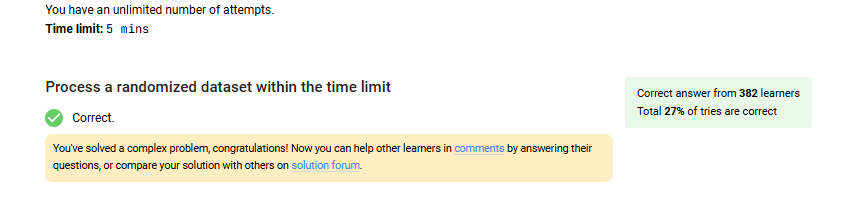

# 1.3 String Reconstruction as a Walk in the Overlap Graph



1.  **The "Genome Path":** The ideal, correctly assembled sequence can be visualized as a "genome path," which is an ordered chain of k-mers where each one overlaps with the next.

2.  **The Goal vs. Reality:** If this ordered path were known, reconstructing the genome would be simple. However, the actual problem is that we start with an unordered collection of k-mers, not the ordered path.

3.  **Introducing the Overlap Graph:** To find the path, a graph-based approach is introduced. Each unique k-mer from the composition becomes a **node** in a directed graph.

4.  **The Rule for Connections:** A directed **edge** is drawn from one k-mer (Pattern) to another (Pattern') if the suffix of `Pattern` (its last k-1 characters) is identical to the prefix of `Pattern'` (its first k-1 characters).

5.  **The Graph's Name:** The resulting network of nodes and edges is called the **Overlap Graph**.

6.  **Finding the Assembly:** The correct genome assembly, or the "genome path," is hidden as one specific path through the nodes of this complex overlap graph.

7.  **The Problem of Repeats:** Repeated k-mers are the main complication. In the graph, a node corresponding to a repeated k-mer (like "ATG") will have multiple outgoing edges, creating confusing branching points that make it difficult to determine the single correct path.

8.  **Formalizing the Solution:** The problem of genome assembly is now reframed: we must find a path that visits **every single node** in the overlap graph **exactly once**.

9.  **The Hamiltonian Path:** This specific type of path, which visits every node exactly once, is known in graph theory as a **Hamiltonian path**.

10. **Ambiguity in Assembly:** A major issue arises because an overlap graph can have **more than one** possible Hamiltonian path. This means a single set of k-mers can sometimes be assembled into different valid genomes, making the true reconstruction uncertain.

11. **Connection to a Theoretical Problem:** This challenge is linked to a historical problem tackled by Nicolaas de Bruijn: finding a "k-universal string," which is a string containing every possible binary k-mer exactly once.

12. **The Scalability Problem:** Finding a k-universal string can be seen as finding a Hamiltonian path in an overlap graph of all possible k-mers. However, this becomes computationally impossible for large 'k' because the graph grows to an unmanageable size (e.g., over a million nodes for k=20).

13. **Hinting at a Better Graph:** The text concludes by stating that the standard overlap graph is not the best tool for this job. De Bruijn invented a "completely different and non-intuitive" type of graph to solve his problem, hinting that a new approach is needed beyond the Hamiltonian path search in an overlap graph.

### The challenge 1
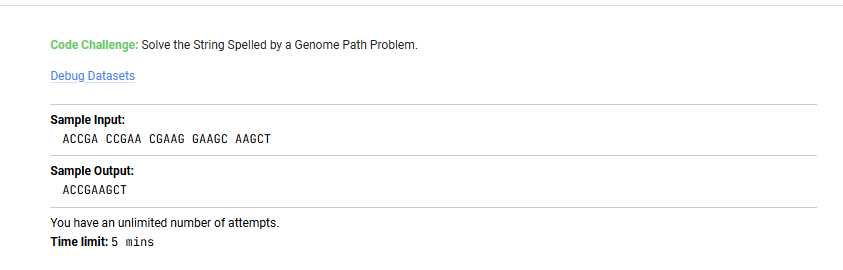

In [2]:
from io import StringIO
from google.colab import files
import os

# Upload the file
uploaded = files.upload()

# Assuming you uploaded a single file, get its name and content
for filename, content in uploaded.items():
    # Decode the byte content to a string and wrap it in StringIO
    path = StringIO(content.decode('utf-8'))
    print(path.read()) # Read the content of the file

Saving dataset_30182_3 (2).txt to dataset_30182_3 (2).txt
GGAGCTGGAGTCTGGAATAGGGTCG GAGCTGGAGTCTGGAATAGGGTCGT AGCTGGAGTCTGGAATAGGGTCGTC GCTGGAGTCTGGAATAGGGTCGTCA CTGGAGTCTGGAATAGGGTCGTCAT TGGAGTCTGGAATAGGGTCGTCATC GGAGTCTGGAATAGGGTCGTCATCA GAGTCTGGAATAGGGTCGTCATCAG AGTCTGGAATAGGGTCGTCATCAGA GTCTGGAATAGGGTCGTCATCAGAC TCTGGAATAGGGTCGTCATCAGACA CTGGAATAGGGTCGTCATCAGACAT TGGAATAGGGTCGTCATCAGACATC GGAATAGGGTCGTCATCAGACATCA GAATAGGGTCGTCATCAGACATCAT AATAGGGTCGTCATCAGACATCATA ATAGGGTCGTCATCAGACATCATAA TAGGGTCGTCATCAGACATCATAAC AGGGTCGTCATCAGACATCATAACA GGGTCGTCATCAGACATCATAACAA GGTCGTCATCAGACATCATAACAAA GTCGTCATCAGACATCATAACAAAG TCGTCATCAGACATCATAACAAAGT CGTCATCAGACATCATAACAAAGTC GTCATCAGACATCATAACAAAGTCT TCATCAGACATCATAACAAAGTCTA CATCAGACATCATAACAAAGTCTAT ATCAGACATCATAACAAAGTCTATG TCAGACATCATAACAAAGTCTATGC CAGACATCATAACAAAGTCTATGCG AGACATCATAACAAAGTCTATGCGC GACATCATAACAAAGTCTATGCGCG ACATCATAACAAAGTCTATGCGCGG CATCATAACAAAGTCTATGCGCGGT ATCATAACAAAGTCTATGCGCGGTT TCATAACAAAGTCTATGCGCGGTTA CATAAC

In [3]:
# Get the entire string content from the StringIO object 'path'.
path_string = path.getvalue()

# Split the string into a list of substrings using whitespace as the delimiter.
# This assumes the kmers in the file are separated by spaces.
path_list = path_string.split()

In [5]:
# This function attempts to reconstruct a genome string from an ordered list of kmers.
# It assumes the kmers are provided in the correct order.
# It takes the first kmer as the start and appends the last character
# of each subsequent kmer.
def path_to_genome(path):
    # Choose  the first kmer as starting kmer from the pat
    # depending on the exact problem definition, as the goal is usually a single path).
    genome = path[0]
    # Append the last character of each subsequent kmer to the genome string.
    # This assumes a perfect overlap of k-1 between consecutive kmers.
    for kmer in path[1:]:
        genome += kmer[-1]
    return genome

# Reconstruct the genome using the path_to_genome function.
result = path_to_genome(path_list) # Using path_list from previous cell
print(result)

GGAGCTGGAGTCTGGAATAGGGTCGTCATCAGACATCATAACAAAGTCTATGCGCGGTTAAAATATATCGTTGGGCAGGCTCACTTGCTACGCGGTGTCCACTAAACGCACCTACAATAGGATAGATTGGAATTCAATCCTTTTGTGCAAATTCACCCTATCAGGTCAAGTGAGCGCCTCACAGTATATATCAGGCCTGACTACCAAGTTAGAGGTAATTAGTTGTGTAGGAAACTTTTCGTCCCCTGATAGTATCCATCCTGGGCGTTGGCCAACAATGGTCAGATGGATAACGAAAGGATACCCGTCGACCAGTGTCCACATGCGTACAGAACCCGGCCAGGCGCTTGTCGAACATCTTAGGTCTATTGAACGGGCGTTCGGATACAGGCCGACATAGTCGTCGTGTGTCACGGCGCTTTGAAGTGATAAGCCGCTTGACGCCGACCCAGGGGCAGACTCCACGTGAGGGATTAGCTTGGTGCATAGACTAGTTCTTCGTCTGGCTGTACCTTAAGAGCGTTGTGTCTAAAGAGCTGTGGCCAAAGTATACTATTAAATATCGTAGGGGACCTCTCTTCCGTGAGCCGAACGAGCCCATTCAACGGGAACACTTTACCTTTGCGTGGGCGTCTTTATGAGCACGTATAACGGGATCTGTGACGAGCTATTAGCACGCAGGACTCCAGACAGGTGTATCCCGCCTACGTGGAAGTAATGGGTCCGGGCTTCTAAGTGACAATCGGTCGGCTGTGGGCAAGACGGTGTAGGTACATGATAACTACACCAAGCTGAAGCTCAACAGTACGGAGCGTATTTGAGAAATGTTGCATATAGTAGGATGGAACAGTGAGTTGCAGCGCTCTACAACAAGCCCTTTACTTCAATCAAATCTTCGTCAGGTTATCAATCAAGCAAGCAGTATAGGGTTGCGGTCGGCCGACTCGAACCTGCTGGGGGTTTGGAAAAACTTGAGAGTTGTGACGGGCGAGGCAGGCAT

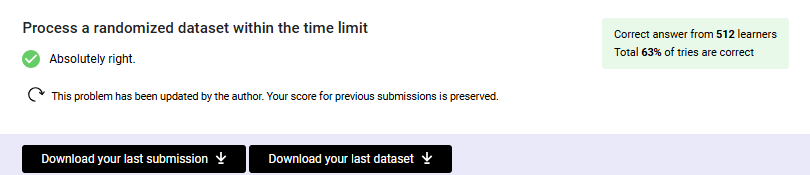

## The 2nd Challenge
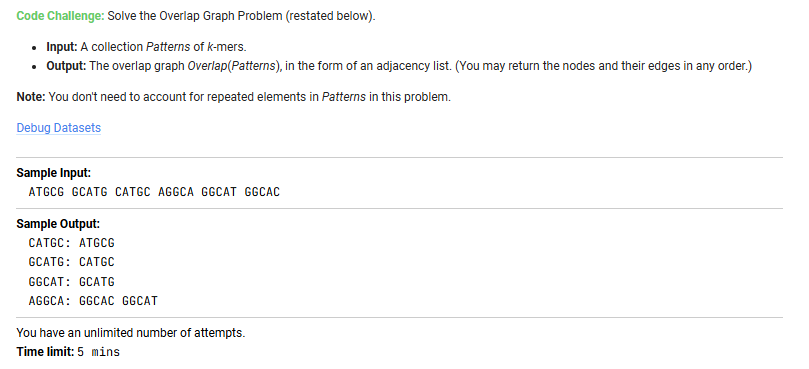

In [32]:
from io import StringIO
from google.colab import files
import os

# Upload the file
uploaded = files.upload()

# Assuming you uploaded a single file, get its name and content
for filename, content in uploaded.items():
    # Decode the byte content to a string and wrap it in StringIO
    path = StringIO(content.decode('utf-8'))
    print(path.read()) # Read the content of the file

Saving dataset_30182_10.txt to dataset_30182_10.txt
ATCCTCACATACCGTCGCTCGTGGA TACGTGGATACTCAGTATCCCAACG TTTGGAGGAGCTTACTACCCAATTC TCCTGCGTACGGGTCATGCGCGGTT AAACAGTCCTGCGTACGGGTCATGC TCCATTGTGGGTACCATCCTCTGTA TATGCCAGGTGAGGACTTATCGGAG ACTTTGGAGGAGCTTACTACCCAAT CGATGTTCTTGGTCACATTACCAGA GAGAGAACCAGTCTACGCAGCATGG GTATGCCAGGTGAGGACTTATCGGA GACTCCCTCGGACGAGTGTGCACCC GTGAATGTTGTGGTAGTCGGCATAG TCTCTGAAAACTTTGTAACGGTCTT CTCCGGTGTATCTCTCAGCGTTCTC TTGACGCCCGCTCTTAGTAATAAAG TCTTTAGGCGGTAAAATCTCGGGTT GCCCATGACGTAACCAACTTGCTTA GATTTTAATCCTGCATTTTCATTAC AGTTGTGAGGTGGTGCTTAGCCGTA CGAGCGGCCTGAGGCCACACTTAAG ACTTCCTTTAGTATTCATCAACTTA GGGATCCTTACGCGCGCTCCGTATA ACAGGGACTCACCGATGTATTAATC ACAAAATCGCGATATCCTCTTCATT GTATAGAAACTCACGAAGCGCAAAT GTACGCCCCAGGGTGAGTACGCTGT ACCAGACTGAGGTGCAAGTTTCTCC CTATTGTCGAGGGAATACTGGTCCC CCGATAGGACAAGACTGGTGCTGTA CGTAAAAGGATATCTCATCATAAGA ACCAATATATACAAATTGACGGATT CGCCCCAGGGTGAGTACGCTGTAGC GAATCTGGACTGTTCCTGACCAACA CCTCCTCAGCCAACACGATCAGTCG CACATCCCACGCGAATTCCCCTTTC TCGTCGGGGGAC

In [35]:
# Get the entire string content from the StringIO object 'path'.
kmers_string = path.getvalue()

# Split the string into a list of substrings using whitespace as the delimiter.
# This assumes the kmers in the file are separated by spaces.
kmers_list = kmers_string.split()

In [27]:
def overlapgraph(patterns):
    # Initialize an empty dictionary to store the overlap graph.
    # The keys will be the patterns (nodes), and the values will be lists of patterns
    # that the key pattern overlaps with (outgoing edges).
    graph = {}
    k = len(patterns[0]) # Assuming all patterns have the same length

    # Iterate through each pattern in the input list.
    for pattern1 in patterns:
        # Initialize a list to store patterns that overlap with pattern1.
        overlaps = []
        # Iterate through every other pattern in the input list.
        for pattern2 in patterns:
            # Skip if comparing a pattern with itself.
            if pattern1 == pattern2:
                continue
            # Check if the suffix of pattern1 (last k-1 characters)
            # matches the prefix of pattern2 (first k-1 characters).
            if pattern1[1:] == pattern2[:-1]:
                # If there's an overlap, add pattern2 to the list of overlaps for pattern1.
                overlaps.append(pattern2)
        # If pattern1 has any overlaps, add it to the graph dictionary.
        if overlaps:
            graph[pattern1] = overlaps
    # Return the constructed overlap graph.
    return graph

In [36]:
# Call the overlapgraph function with the 'dictionary' list
# and print the resulting overlap graph in acceptable format
for key, values in overlapgraph(kmers_list).items():
    print(f"{key}: {' '.join(values)}")

ATCCTCACATACCGTCGCTCGTGGA: TCCTCACATACCGTCGCTCGTGGAC
TACGTGGATACTCAGTATCCCAACG: ACGTGGATACTCAGTATCCCAACGA
TTTGGAGGAGCTTACTACCCAATTC: TTGGAGGAGCTTACTACCCAATTCG
TCCTGCGTACGGGTCATGCGCGGTT: CCTGCGTACGGGTCATGCGCGGTTC
AAACAGTCCTGCGTACGGGTCATGC: AACAGTCCTGCGTACGGGTCATGCG
TCCATTGTGGGTACCATCCTCTGTA: CCATTGTGGGTACCATCCTCTGTAG
TATGCCAGGTGAGGACTTATCGGAG: ATGCCAGGTGAGGACTTATCGGAGA
ACTTTGGAGGAGCTTACTACCCAAT: CTTTGGAGGAGCTTACTACCCAATT
CGATGTTCTTGGTCACATTACCAGA: GATGTTCTTGGTCACATTACCAGAA
GAGAGAACCAGTCTACGCAGCATGG: AGAGAACCAGTCTACGCAGCATGGT
GTATGCCAGGTGAGGACTTATCGGA: TATGCCAGGTGAGGACTTATCGGAG
GACTCCCTCGGACGAGTGTGCACCC: ACTCCCTCGGACGAGTGTGCACCCC
GTGAATGTTGTGGTAGTCGGCATAG: TGAATGTTGTGGTAGTCGGCATAGT
TCTCTGAAAACTTTGTAACGGTCTT: CTCTGAAAACTTTGTAACGGTCTTT
CTCCGGTGTATCTCTCAGCGTTCTC: TCCGGTGTATCTCTCAGCGTTCTCG
TTGACGCCCGCTCTTAGTAATAAAG: TGACGCCCGCTCTTAGTAATAAAGC
TCTTTAGGCGGTAAAATCTCGGGTT: CTTTAGGCGGTAAAATCTCGGGTTG
GCCCATGACGTAACCAACTTGCTTA: CCCATGACGTAACCAACTTGCTTAC
GATTTTAATCCTGCATTTTCATTAC: ATTTTAATCCTGCATTTTC

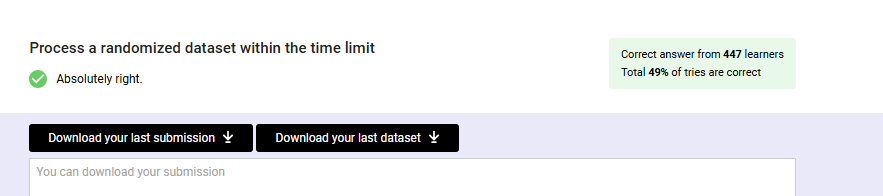

### The Excercize of the Section

In [37]:
# @title Step 1: Set up the De Bruijn Graph
# We will construct a 4-universal string, so k=4.
k = 4

# The nodes of the De Bruijn graph are all binary strings of length k-1 (3-mers)
num_nodes = 2**(k - 1)
nodes = [bin(i)[2:].zfill(k - 1) for i in range(num_nodes)]

# The graph will be represented as an adjacency list.
# A dictionary where keys are nodes and values are lists of neighbors.
graph = {node: [] for node in nodes}

# The edges are all binary strings of length k (4-mers).
# Each edge connects its prefix node to its suffix node.
num_edges = 2**k
for i in range(num_edges):
    edge = bin(i)[2:].zfill(k)
    prefix = edge[:k-1]
    suffix = edge[1:]
    graph[prefix].append(suffix)

print("De Bruijn Graph (Adjacency List):")
# Print a few examples from the graph
for i in range(4):
  node = nodes[i]
  print(f"Node '{node}' has edges leading to neighbors: {graph[node]}")

De Bruijn Graph (Adjacency List):
Node '000' has edges leading to neighbors: ['000', '001']
Node '001' has edges leading to neighbors: ['010', '011']
Node '010' has edges leading to neighbors: ['100', '101']
Node '011' has edges leading to neighbors: ['110', '111']


In [41]:
# @title Step 2: Find a Randomized Eulerian Cycle

import collections
import random # Import the random library

def find_random_eulerian_cycle(graph):
    # Make a copy of the graph to modify
    graph_copy = collections.defaultdict(list)
    for u, vs in graph.items():
        # *** THIS IS THE KEY CHANGE ***
        # Shuffle the list of neighbors to introduce randomness
        # so we explore a different path each time.
        shuffled_vs = list(vs)
        random.shuffle(shuffled_vs)
        graph_copy[u] = shuffled_vs

    stack = []
    path = []
    start_node = '0' * (k - 1)
    stack.append(start_node)

    while stack:
        current_node = stack[-1]
        if graph_copy[current_node]:
            next_node = graph_copy[current_node].pop()
            stack.append(next_node)
        else:
            path.append(stack.pop())

    return path[::-1]


# --- Run the function multiple times to get different answers ---
print("Generating 5 different valid 4-universal strings:\n")

for i in range(5):
    # Find a new random cycle each time
    cycle_path = find_random_eulerian_cycle(graph)

    # Reconstruct the string from the path
    first_node = cycle_path[0]
    last_chars = "".join([node[-1] for node in cycle_path[1:]])
    linear_universal_string = first_node + last_chars

    print(f"Solution {i+1}:  {linear_universal_string}")

Generating 5 different valid 4-universal strings:

Solution 1:  0001011110100110000
Solution 2:  0001100101111010000
Solution 3:  0001001101011110000
Solution 4:  0001001101011110000
Solution 5:  0001101011110010000


In [42]:
# @title Find All 16 Possible 4-Universal Strings

import collections

k = 4
num_edges_total = 2**k

# --- Step 1: Build the De Bruijn Graph ---
def build_graph(k):
    graph = collections.defaultdict(list)
    num_edges = 2**k
    for i in range(num_edges):
        edge = bin(i)[2:].zfill(k)
        prefix = edge[:k-1]
        suffix = edge[1:]
        graph[prefix].append(suffix)
    return graph

# --- Step 2: Implement the Backtracking Search ---
# This recursive function will explore all possible paths

solutions = [] # A list to store all found solutions

def find_all_paths(graph, current_node, path, edges_used_count):
    # Base Case: If we have used all edges, we found a full cycle
    if edges_used_count == num_edges_total:
        solutions.append(list(path)) # Store a copy of the successful path
        return

    # Recursive Step: Explore all outgoing edges from the current node
    # We must iterate over a copy of the neighbors list because we modify it
    for neighbor in list(graph[current_node]):

        # 1. "DO": Make the move
        path.append(neighbor)
        graph[current_node].remove(neighbor) # Use this edge

        # 2. "RECURSE": Continue the search from the new node
        find_all_paths(graph, neighbor, path, edges_used_count + 1)

        # 3. "UNDO": Backtrack to explore other possibilities
        graph[current_node].append(neighbor) # Put the edge back
        path.pop()


# --- Step 3: Run the search and print the results ---
de_bruijn_graph = build_graph(k)
start_node = '0' * (k-1)
initial_path = [start_node] # The path starts with the first node

find_all_paths(de_bruijn_graph, start_node, initial_path, 0)


# --- Step 4: Convert node paths to the final linear strings ---
# We use a set to ensure we only print unique strings, as some
# paths might be rotations of each other but produce the same linear string.
final_strings = set()
for p in solutions:
    first_node = p[0]
    last_chars = "".join([node[-1] for node in p[1:]])
    linear_string = first_node + last_chars
    final_strings.add(linear_string)


print(f"Found {len(final_strings)} unique 4-universal strings. They are:\n")
for i, s in enumerate(sorted(list(final_strings))):
    print(f"{i+1:2d}. {s}")

Found 32 unique 4-universal strings. They are:

 1. 0000100110101111000
 2. 0000100111101011000
 3. 0000101001101111000
 4. 0000101001111011000
 5. 0000101100111101000
 6. 0000101101001111000
 7. 0000101111001101000
 8. 0000101111010011000
 9. 0000110010111101000
10. 0000110100101111000
11. 0000110101111001000
12. 0000110111100101000
13. 0000111100101101000
14. 0000111101001011000
15. 0000111101011001000
16. 0000111101100101000
17. 0001001101011110000
18. 0001001111010110000
19. 0001010011011110000
20. 0001010011110110000
21. 0001011001111010000
22. 0001011010011110000
23. 0001011110011010000
24. 0001011110100110000
25. 0001100101111010000
26. 0001101001011110000
27. 0001101011110010000
28. 0001101111001010000
29. 0001111001011010000
30. 0001111010010110000
31. 0001111010110010000
32. 0001111011001010000


In [44]:
# @title Step 5: Generate and Print All Possible "Cuts" for Each Solution

all_linear_representations = set()

# Loop through each of the 16 canonical solutions we found
for i, canonical_string in enumerate(sorted(list(final_strings))):
    print(f"--- Group {i+1} (from canonical start: {canonical_string[:8]}...) ---")

    # Get the 16-character cyclic core
    cyclic_core = canonical_string[:16]

    cuts_for_this_cycle = set()

    # Generate all 16 possible rotations
    for j in range(len(cyclic_core)):
        # Rotate the cyclic core string
        rotated_core = cyclic_core[j:] + cyclic_core[:j]

        # Rebuild the full 19-character linear string from the rotated core
        # by appending its first k-1 (3) characters
        linear_representation = rotated_core + rotated_core[:k-1]

        cuts_for_this_cycle.add(linear_representation)
        all_linear_representations.add(linear_representation)

    # Print all the cuts found for this specific cycle, sorted for clarity
    for cut in sorted(list(cuts_for_this_cycle)):
        # Highlight the string you asked about!
        if cut == "1111010000101100111":
             print(f"  -> {cut}  <-- great!")
        else:
             print(f"  -> {cut}")
    print("-" * 50 + "\n")

print(f"\nTotal number of unique linear representations found: {len(all_linear_representations)}")

--- Group 1 (from canonical start: 00001001...) ---
  -> 0000100110101111000
  -> 0001001101011110000
  -> 0010011010111100001
  -> 0011010111100001001
  -> 0100110101111000010
  -> 0101111000010011010
  -> 0110101111000010011
  -> 0111100001001101011
  -> 1000010011010111100
  -> 1001101011110000100
  -> 1010111100001001101
  -> 1011110000100110101
  -> 1100001001101011110
  -> 1101011110000100110
  -> 1110000100110101111
  -> 1111000010011010111
--------------------------------------------------

--- Group 2 (from canonical start: 00001001...) ---
  -> 0000100111101011000
  -> 0001001111010110000
  -> 0010011110101100001
  -> 0011110101100001001
  -> 0100111101011000010
  -> 0101100001001111010
  -> 0110000100111101011
  -> 0111101011000010011
  -> 1000010011110101100
  -> 1001111010110000100
  -> 1010110000100111101
  -> 1011000010011110101
  -> 1100001001111010110
  -> 1101011000010011110
  -> 1110101100001001111
  -> 1111010110000100111
--------------------------------------------

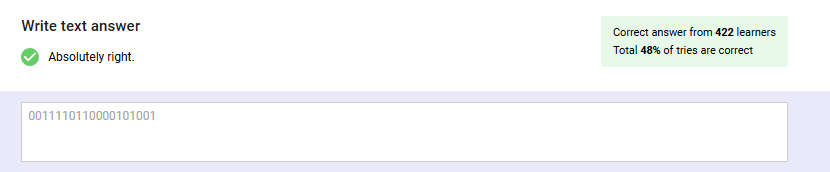

# 1.4 Another Graph for String Reconstruction



1.  **A Fundamental Shift in Representation:** The De Bruijn graph uses a different approach from the overlap graph. Here, the k-mers of the genome are assigned to the **edges** of a graph, not the nodes.

2.  **Nodes as Overlaps:** Consequently, the **nodes** in a De Bruijn graph represent the overlaps between consecutive k-mers. Each node is labeled with a **(k-1)-mer**.

3.  **The "Path Graph" Starting Point:** The construction begins with a simple "path graph"—a straight line where each k-mer is an edge connected in the order it appears in the genome, linked by its corresponding (k-1)-mer node.

4.  **The "Gluing" Process:** The final De Bruijn graph is created by merging, or "gluing together," all the nodes in the path graph that have the exact same (k-1)-mer label.

5.  **An Example of Gluing:** If a genome path results in three separate nodes all labeled "AT", the gluing process collapses them into a single, shared "AT" node.

6.  **Effect of Gluing:** This process significantly reduces the number of nodes compared to the initial path graph. However, the total number of edges (representing the k-mers) remains unchanged.

7.  **Clear Representation of Repeats:** Genomic repeats are visualized clearly. If a k-mer like "ATG" appears three times, the final graph will show three distinct edges connecting the single "AT" node to the single "TG" node.

8.  **Formation of Loops:** When a k-mer consists of a repeated (k-1)-mer (e.g., "GGG"), the edge connects a "GG" node to another "GG" node. Gluing these identical nodes creates a **loop**—an edge that starts and ends at the same node.

9.  **The Formal Problem:** This process defines a new computational task: the "De Bruijn Graph from a String Problem," which asks for the construction of this graph from an input string and a value `k`.

10. **The Ultimate Goal:** The purpose of creating this different graph structure is to find a more effective way to solve the main String Reconstruction Problem, as it offers a new framework for assembling a genome from its constituent k-mers.

### Code challenge of the section
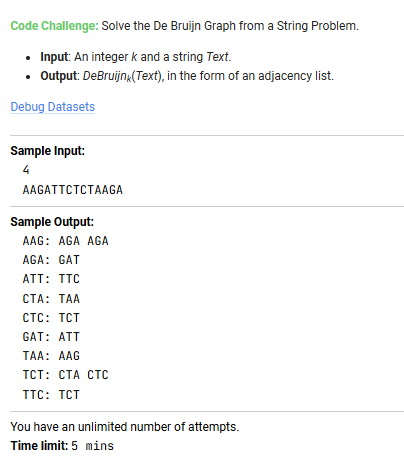

In [15]:
#@title uploading the dataset
from io import StringIO
from google.colab import files
import os

# Upload the file
uploaded = files.upload()

# Assuming you uploaded a single file, get its name and content
for filename, content in uploaded.items():
    # Decode the byte content to a string and wrap it in StringIO
    path = StringIO(content.decode('utf-8'))
# Get the entire string content from the StringIO object 'path' and splitting it to k and Text.
text_string = path.getvalue()[4:].strip()
k = path.getvalue()[0:1]

Saving dataset_30183_6 (2).txt to dataset_30183_6 (2).txt


In [18]:
import collections

def de_bruijn_from_string(text, k):
    """
    Constructs the De Bruijn graph from a string.
    The k-mers in the text define the edges.
    The (k-1)-mers (prefixes/suffixes) are the nodes.
    """
    # Use a defaultdict to automatically handle new nodes.
    # The value will be a list of neighbors.
    adj_list = collections.defaultdict(list)

    # Iterate through all k-mers in the text
    # The number of k-mers is len(text) - k + 1
    for i in range(len(text) - k + 1):
        # Extract the k-mer
        kmer = text[i:i+k]

        # The prefix is the source node
        prefix = kmer[:-1]

        # The suffix is the destination node
        suffix = kmer[1:]

        # Add the directed edge from the prefix node to the suffix node
        adj_list[prefix].append(suffix)

    return adj_list

In [20]:
# Generate the graph
text = text_string
k= 12
graph = de_bruijn_from_string(text, k)

# --- Format and print the output to match the sample exactly ---
# The sample output is sorted alphabetically by the node (key).
for node in sorted(graph.keys()):
    # The neighbors for each node are also sorted in the sample output.
    neighbors = sorted(graph[node])
    print(f"{node}: {' '.join(neighbors)}")

AAAACTACTTG: AAACTACTTGG
AAAATCTCTAC: AAATCTCTACG
AAACATCCTGC: AACATCCTGCG
AAACCCACGCG: AACCCACGCGG
AAACCTCATTG: AACCTCATTGA
AAACGTTAGAC: AACGTTAGACT
AAACTAATAAC: AACTAATAACT
AAACTACTTGG: AACTACTTGGA
AAACTGCAATG: AACTGCAATGC
AAACTTTTGAT: AACTTTTGATA
AAAGAGAATTA: AAGAGAATTAT
AAAGCACTGGA: AAGCACTGGAT
AAAGCCAAGAT: AAGCCAAGATA
AAAGCGTGACT: AAGCGTGACTG
AAAGCTATCGT: AAGCTATCGTT
AAAGCTCCCAC: AAGCTCCCACG
AAAGCTTCAGT: AAGCTTCAGTT
AAAGGAGGGTT: AAGGAGGGTTG
AAAGGCAGTTA: AAGGCAGTTAC
AAAGTACATTC: AAGTACATTCT
AAAGTTATTTC: AAGTTATTTCA
AAAGTTTATAC: AAGTTTATACA
AAATACATTCA: AATACATTCAA
AAATCAAGTCT: AATCAAGTCTG
AAATCACACGG: AATCACACGGA
AAATCACGCGG: AATCACGCGGA
AAATCTCTACG: AATCTCTACGG
AAATTTTTGGG: AATTTTTGGGC
AACAAAGAGAA: ACAAAGAGAAT
AACACGCTACC: ACACGCTACCT
AACATACGGGG: ACATACGGGGA
AACATCCTGCG: ACATCCTGCGT
AACATCGAGTC: ACATCGAGTCC
AACATGAGCGA: ACATGAGCGAG
AACATTTGTCT: ACATTTGTCTA
AACCCACGCGG: ACCCACGCGGT
AACCCTGTCGA: ACCCTGTCGAA
AACCTCATTGA: ACCTCATTGAT
AACGAAAGCGT: ACGAAAGCGTG
AACGATCGCGG: ACGATCGCGGC


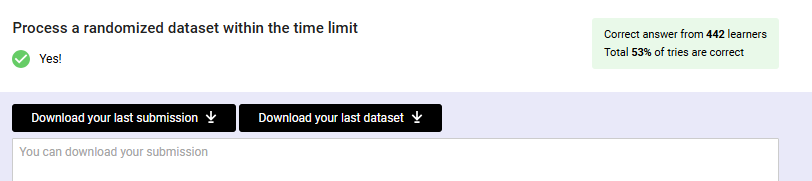

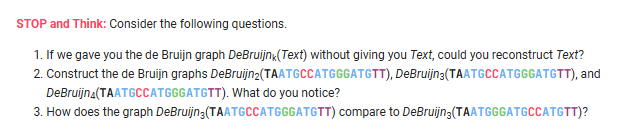

In [23]:
# contructing DeBruijn2(TAATGCCATGGGATGTT), DeBruijn3(TAATGCCATGGGATGTT), and DeBruijn4(TAATGCCATGGGATGTT).
graph = de_bruijn_from_string(text, k)
# --- Format and print the output to match the sample exactly ---
# The sample output is sorted alphabetically by the node (key).
for k in [2 ,3,4]:
    graph = de_bruijn_from_string(text, k)
    print(f"DeBruijn{k}({text}):")
    for node in graph.keys():
        # The neighbors for each node are also sorted in the sample output.
        neighbors = graph[node]
        print(f"{node}: {' '.join(neighbors)}")

DeBruijn2(TAATGCCATGGGATGTT):
T: A G G G T
A: A T T T
G: C G G A T
C: C A
DeBruijn3(TAATGCCATGGGATGTT):
TA: AA
AA: AT
AT: TG TG TG
TG: GC GG GT
GC: CC
CC: CA
CA: AT
GG: GG GA
GA: AT
GT: TT
DeBruijn4(TAATGCCATGGGATGTT):
TAA: AAT
AAT: ATG
ATG: TGC TGG TGT
TGC: GCC
GCC: CCA
CCA: CAT
CAT: ATG
TGG: GGG
GGG: GGA
GGA: GAT
GAT: ATG
TGT: GTT


In [25]:
#@title Comparing graphs for TAATGCCATGGGATGTT and TAATGGGATGCCATGTT
text1= "TAATGCCATGGGATGTT"
k =3
graph1 = de_bruijn_from_string(text1, k)
print(f"DeBruijn{k}({text1}):")
for node in graph1.keys():
    # The neighbors for each node are also sorted in the sample output.
    neighbors = graph1[node]
    print(f"{node}: {' '.join(neighbors)}")
print("-----------------------")
text2= "TAATGGGATGCCATGTT"
k=3
graph2 = de_bruijn_from_string(text2, k)
print(f"DeBruijn{k}({text2}):")
for node in graph2.keys():
    # The neighbors for each node are also sorted in the sample output.
    neighbors = graph2[node]
    print(f"{node}: {' '.join(neighbors)}")

DeBruijn3(TAATGCCATGGGATGTT):
TA: AA
AA: AT
AT: TG TG TG
TG: GC GG GT
GC: CC
CC: CA
CA: AT
GG: GG GA
GA: AT
GT: TT
-----------------------
DeBruijn3(TAATGGGATGCCATGTT):
TA: AA
AA: AT
AT: TG TG TG
TG: GG GC GT
GG: GG GA
GA: AT
GC: CC
CC: CA
CA: AT
GT: TT


### Stop and Think answers
**1. Can you reconstruct Text from its De Bruijn graph?**


> Yes, in theory. Reconstructing the text is equivalent to finding a path in the graph that visits every edge exactly once (an "Eulerian Path"). However, because of repeats (nodes with multiple outgoing edges), there might be more than one possible path, meaning the reconstruction is not always unique.

### 2. What do you notice comparing graphs with `k=2, 3, 4`?

As **`k` increases**, the graph becomes **less tangled and more linear**.

*   **Small `k` (k=2):** The nodes (1-mers) are very generic (`A`, `T`, `C`, `G`), so many edges get collapsed onto a few nodes, creating a complex, tangled graph with many loops.
*   **Large `k` (k=4):** The nodes (3-mers) are more specific. This reduces how often nodes are "glued" together, which "unravels" the graph, making the correct path for reconstruction much clearer.

### 3. How do the graphs for `TAATGCCATGGGATGTT` and `TAATGGGATGCCATGTT` compare?

The De Bruijn graphs for these two strings are **perfectly identical**.

Both strings are anagrams of each other at the k-mer level—they contain the exact same collection of 3-mers, just in a different order. Since they have the same set of edges (k-mers) and nodes ((k-1)-mers), the resulting graph structure is the same. The two different original strings simply represent **two different valid Eulerian paths** through that one graph.

# 1.5 Walking in the de Bruijn Graph


1.  **A New Approach for Reconstruction:** String reconstruction can be solved by finding an **Eulerian Path** in the corresponding De Bruijn graph. An Eulerian path is one that visits every single **edge** of the graph exactly once.

2.  **The Initial Paradox:** A critical problem arises: the first method shown for building a De Bruijn graph required knowing the original text's sequence to create a `PathGraph`, which was then "glued" together. This is useless for assembly, as the text is the unknown we're trying to find.

3.  **Introducing the Composition Graph:** To solve this, a new concept is introduced—the `CompositionGraph`. This is simply a collection of many **isolated edges**, where each edge represents one k-mer from the (unordered) input list.

4.  **The Solution: Gluing from Composition:** The paradox is resolved by a key insight: if you take the `CompositionGraph` (which *can* be built from an unordered list of k-mers) and "glue" its identically labeled nodes, you create the **exact same** De Bruijn graph.

5.  **Order-Independent Construction:** This proves that the structure of the De Bruijn graph depends only on the *collection* of k-mers, not their original order in the genome.

6.  **A More Direct Construction Method:** A simpler, more practical algorithm to build the De Bruijn graph (without needing the "gluing" analogy) is then presented.

7.  **Step 1 of Direct Method (Nodes):** First, identify all unique `(k-1)`-mers that appear as either a prefix or a suffix in the k-mer list. These unique `(k-1)`-mers become the **nodes** of the graph.

8.  **Step 2 of Direct Method (Edges):** Then, for every `k`-mer in the original input list, draw a directed **edge** from its prefix node to its suffix node.

9.  **Two Competing Frameworks:** This solidifies the two distinct methods for solving the String Reconstruction Problem:
    *   Find a **Hamiltonian Path** (visits every *node* once) in an **Overlap Graph**.
    *   Find an **Eulerian Path** (visits every *edge* once) in a **De Bruijn Graph**.

10. **The Pivotal Choice:** The text emphasizes that choosing between these two approaches is a "pivotal decision" in computational genomics.

11. **Why Size Isn't the Deciding Factor:** One might prefer the De Bruijn graph simply because it looks smaller or less tangled. However, for real genomes with millions of reads, both graphs are enormous, so visual simplicity is irrelevant.

12. **The Real Deciding Factor: Algorithmic Efficiency:** The correct reason to choose one graph over the other is purely based on **algorithmic efficiency**. The better choice is the graph whose corresponding path problem (Hamiltonian vs. Eulerian) has an efficient and reliable algorithm.

13. **Hinting at the Answer:** The text concludes by alluding to 18th-century mathematics, strongly hinting that the Eulerian Path problem, unlike the Hamiltonian Path problem, has a known, efficient solution, making the De Bruijn graph the superior choice.

### Section's challenge

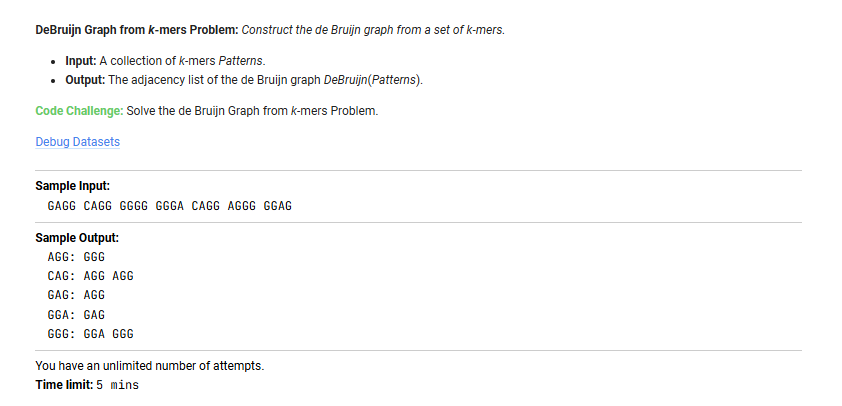

In [41]:
#@title uploading the dataset for the challenge
from io import StringIO
from google.colab import files
import os

# Upload the file
uploaded = files.upload()

# Assuming you uploaded a single file, get its name and content
for filename, content in uploaded.items():
    # Decode the byte content to a string and wrap it in StringIO
    text = StringIO(content.decode('utf-8'))
# Get the entire string content from the StringIO object 'text' and splitting it list of kmers.
kmers_list = text.getvalue().strip().split()

Saving dataset_30184_8.txt to dataset_30184_8.txt


In [39]:
import collections

def drawgraph(adj_list):
  for node in sorted(adj_list.keys()):
    neighbors = sorted(adj_list[node])
    print(f"{node}: {' '.join(neighbors)}")

def de_bruijn_from_kmers(kmers):
    """
    Constructs the De Bruijn graph from a list of kmers.
    The k-mers define the edges.
    The (k-1)-mers (prefixes/suffixes) are the nodes.
    """
    # Use a defaultdict to automatically handle new nodes.
    # The value will be a list of neighbors.
    adj_list = collections.defaultdict(list)

    # Iterate through all k-mers in given list
    for kmer in kmers:

        # The prefix is the source node
        prefix = kmer[:-1]

        # The suffix is the destination node
        suffix = kmer[1:]

        # Add the directed edge from the prefix node to the suffix node
        adj_list[prefix].append(suffix)
    return drawgraph(adj_list)

In [43]:
de_bruijn_from_kmers(kmers_list)

AAAACATTTCGCGATGTCA: AAACATTTCGCGATGTCAT
AAAACCTCGGTCGTCTCGA: AAACCTCGGTCGTCTCGAT
AAAACTTGCGTAAGCCCTT: AAACTTGCGTAAGCCCTTC
AAAAGAAATGAACCAGTCG: AAAGAAATGAACCAGTCGA
AAAATCCATAGTTACCTGA: AAATCCATAGTTACCTGAC
AAAATGGGGGTATAGCTCT: AAATGGGGGTATAGCTCTA
AAACATAAATGCTCGTTGG: AACATAAATGCTCGTTGGT
AAACATTTCGCGATGTCAT: AACATTTCGCGATGTCATA
AAACCTCGGTCGTCTCGAT: AACCTCGGTCGTCTCGATG
AAACTTGCGTAAGCCCTTC: AACTTGCGTAAGCCCTTCT
AAAGAAATGAACCAGTCGA: AAGAAATGAACCAGTCGAG
AAAGCCCCACAACGCTACA: AAGCCCCACAACGCTACAA
AAAGCCGGCCTGCCTAGTA: AAGCCGGCCTGCCTAGTAG
AAAGGATAGGCATGTACGG: AAGGATAGGCATGTACGGA
AAAGGATCAACATTATGAG: AAGGATCAACATTATGAGA
AAAGGGGGAAAGCCCCACA: AAGGGGGAAAGCCCCACAA
AAAGGTAGTTTACTCGGAA: AAGGTAGTTTACTCGGAAA
AAATAGCCGATCGTTGGCC: AATAGCCGATCGTTGGCCC
AAATATCGAGCTTGGCGCC: AATATCGAGCTTGGCGCCA
AAATCCATAGTTACCTGAC: AATCCATAGTTACCTGACG
AAATGAACCAGTCGAGTTT: AATGAACCAGTCGAGTTTG
AAATGCTCGTTGGTGATAA: AATGCTCGTTGGTGATAAT
AAATGGGGGTATAGCTCTA: AATGGGGGTATAGCTCTAG
AAATTGCGACTTACGACAC: AATTGCGACTTACGACACG
AACAAAACATTTCGCG

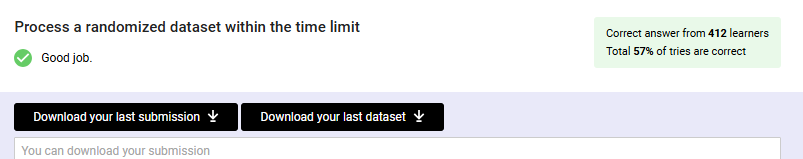

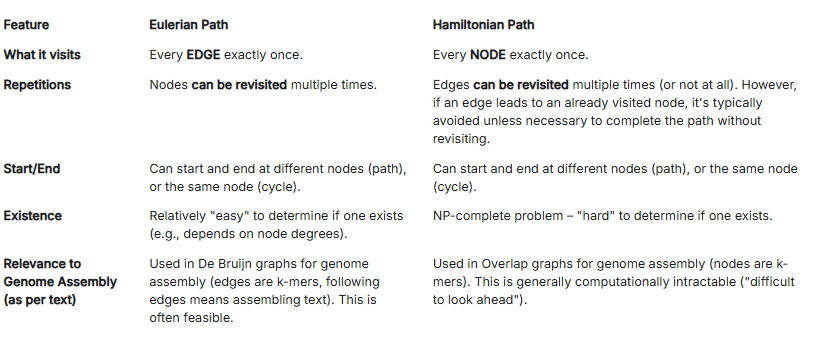

# 1.6 The Seven Bridges of Königsberg



1.  **The Bridges of Königsberg Problem:** The text introduces a famous 18th-century puzzle: Is it possible to take a walk through the city of Königsberg, crossing each of its seven bridges exactly once and returning to the starting point?

2.  **Euler's Abstract Representation:** The mathematician Leonhard Euler solved this by abstracting it into a graph problem. He represented the four land masses as **nodes** and the seven bridges as **edges**, creating a simplified graph of the city.

3.  **Formalizing the Eulerian Cycle:** The puzzle was reframed as finding an "Eulerian cycle" in the graph—a cycle that traverses every **edge** exactly once. Euler proved that for Königsberg, no such cycle exists.

4.  **Euler's Key Contribution:** More importantly, Euler developed a general theorem that provides a simple rule to determine if *any* graph has an Eulerian cycle. This led to an **efficient (polynomial time) algorithm** for finding one if it exists.

5.  **The Hard Alternative: Hamiltonian Paths:** In stark contrast, the **Hamiltonian Path Problem** (visiting every *node* once) has no known efficient algorithm. All attempts to solve it have resulted in slow (exponential time) solutions, making it a famously difficult problem in computer science.

6.  **The Decisive Choice for Genome Assembly:** This crucial difference in computational difficulty provides the answer: the **De Bruijn graph is superior**. Its associated Eulerian Path problem is efficiently solvable, while the Overlap graph's Hamiltonian Path problem is practically intractable for large datasets.

7.  **A Historical Bioinformatics Detour:** For decades, biologists and early bioinformaticians (including those on the Human Genome Project) used the less efficient overlap graph approach, not initially recognizing the power of Euler's solution.

8.  **The Modern Standard:** Today, the De Bruijn graph, once an abstract mathematical concept, has become the **dominant and standard approach** for genome assembly, precisely because its underlying path problem has an efficient solution discovered centuries ago.

# 1.8 Detour: An Introduction to Graphs


1.  **What a Graph Is:** A graph is not a data chart, but a mathematical structure representing connections. It consists of **nodes** (points, like cities) and **edges** (lines connecting the nodes, like roads).

2.  **Modeling Problems with Graphs:** Real-world problems can be translated into graphs. For example, the "Knight's Tour" on a chessboard is modeled by a **Knight Graph**, where each square is a node and every legal knight's move is an edge.

3.  **Representation Doesn't Matter:** The physical layout or drawing of a graph is irrelevant. A graph is defined only by its set of nodes and the specific pairs of nodes that its edges connect.

4.  **Paths and Cycles:** A **path** is a sequence of connected edges that you can travel along. A **cycle** is a special type of path that starts and ends at the same node.

5.  **The Knight's Tour as a Cycle:** The core question of the Knight's Tour—visiting every square once and returning to the start—is equivalent to finding a specific cycle in the Knight Graph that visits every **node** exactly once.

6.  **Degree of a Node:** The **degree** of a node in an undirected graph is the number of edges connected to it. This simple property can be used to solve logic puzzles.

7.  **The Sum of Degrees Rule:** A fundamental property of any undirected graph is that the sum of the degrees of all its nodes is always exactly equal to twice the total number of edges.

8.  **Directed Graphs:** The text introduces **directed graphs**, where edges have a direction, like one-way streets. This is shown with arrows instead of simple lines.

9.  **Indegree and Outdegree:** In a directed graph, each node has an **indegree** (number of incoming edges) and an **outdegree** (number of outgoing edges). The sum of all indegrees must equal the sum of all outdegrees across the entire graph.

10. **Connectivity:** A graph is considered **connected** if there is a path between any two of its nodes. If not, it is a **disconnected graph**, which can be broken down into separate connected components.

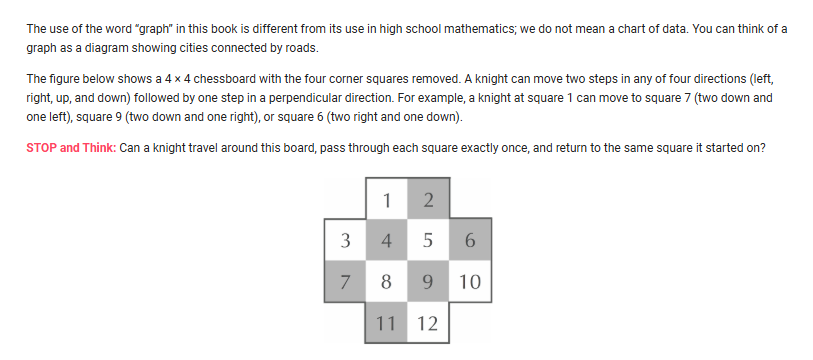

In [57]:
import collections

# --- Correct Graph Definition for the new board ---
nodes = list(range(1, 13))
num_nodes = len(nodes)
# This is the programmatically generated and verified graph for your board
graph ={1: [6, 7, 9], 2: [3, 8, 10], 3: [2, 9,11], 4: [10, 12], 5: [7, 11], 6: [1, 8, 12], 7: [1, 5, 12], 8: [2, 6], 9: [1, 3], 10: [4, 11,2], 11: [3, 5, 10], 12: [4, 6, 7]}

def solve_knight_tour_recursive(path, solutions_list):
    """A recursive backtracking function that appends solutions to a provided list."""
    if len(path) == num_nodes:
        if path[0] in graph[path[-1]]:
            solutions_list.append(list(path))
        return
    current_node = path[-1]
    for neighbor in graph[current_node]:
        if neighbor not in path:
            path.append(neighbor)
            solve_knight_tour_recursive(path, solutions_list)
            path.pop()

# --- Main script ---
for start_node in nodes:
    solutions_for_this_start = []
    solve_knight_tour_recursive([start_node], solutions_for_this_start)

    print(f"--- Results for starting square: {start_node} ---")
    print(f"Found {len(solutions_for_this_start)} closed Hamiltonian cycles.")
    if solutions_for_this_start:
        print("Solutions found:")
        for i, cycle in enumerate(solutions_for_this_start):
            print(f"  {i+1}. {cycle}")
    print("-" * 50)

--- Results for starting square: 1 ---
Found 4 closed Hamiltonian cycles.
Solutions found:
  1. [1, 6, 8, 2, 10, 4, 12, 7, 5, 11, 3, 9]
  2. [1, 7, 5, 11, 10, 4, 12, 6, 8, 2, 3, 9]
  3. [1, 9, 3, 2, 8, 6, 12, 4, 10, 11, 5, 7]
  4. [1, 9, 3, 11, 5, 7, 12, 4, 10, 2, 8, 6]
--------------------------------------------------
--- Results for starting square: 2 ---
Found 4 closed Hamiltonian cycles.
Solutions found:
  1. [2, 3, 9, 1, 7, 5, 11, 10, 4, 12, 6, 8]
  2. [2, 8, 6, 1, 9, 3, 11, 5, 7, 12, 4, 10]
  3. [2, 8, 6, 12, 4, 10, 11, 5, 7, 1, 9, 3]
  4. [2, 10, 4, 12, 7, 5, 11, 3, 9, 1, 6, 8]
--------------------------------------------------
--- Results for starting square: 3 ---
Found 4 closed Hamiltonian cycles.
Solutions found:
  1. [3, 2, 8, 6, 12, 4, 10, 11, 5, 7, 1, 9]
  2. [3, 9, 1, 6, 8, 2, 10, 4, 12, 7, 5, 11]
  3. [3, 9, 1, 7, 5, 11, 10, 4, 12, 6, 8, 2]
  4. [3, 11, 5, 7, 12, 4, 10, 2, 8, 6, 1, 9]
--------------------------------------------------
--- Results for starting square: 4

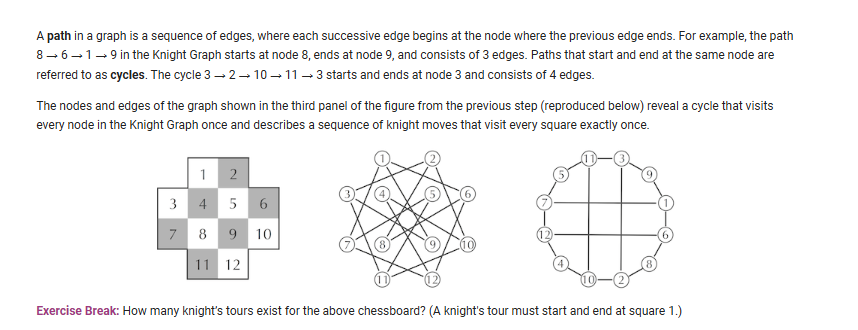

# 1.9 Detour: Tractable and Intractable Problems



1.  **No Easy Trick for Hamiltonian Cycles:** Unlike the Eulerian Cycle problem, which has a simple theorem for solving it, no such easy condition or fast algorithm is known for the Hamiltonian Cycle problem.

2.  **Brute Force is Impossible:** Simply trying every possible path (brute force) is computationally impossible, as the number of paths in even a medium-sized graph can exceed the number of atoms in the universe.

3.  **Introducing NP-Complete Problems:** Due to years of failed attempts to find an efficient solution, the Hamiltonian Cycle Problem is classified as **intractable**. It belongs to a large family of famously difficult problems known as **NP-complete**.

4.  **A Shared Fate:** Computer scientists in the 1970s discovered thousands of other seemingly simple problems that, like the Hamiltonian Cycle, have no known efficient (polynomial time) algorithms.

5.  **The "All for One" Equivalence:** A core feature of NP-complete problems is that they are all computationally **equivalent**. An instance of any NP-complete problem can be quickly transformed into an instance of any other.

6.  **The Ultimate Breakthrough:** This equivalence means that if a fast algorithm is ever discovered for just **one** NP-complete problem, it can be adapted to solve **all of them** efficiently.

7.  **The Million-Dollar Prize:** The quest to find a fast algorithm for an NP-complete problem (or prove that none exists) is so fundamental it's one of the seven "Millennium Problems" established by the Clay Mathematics Institute, with a one-million-dollar prize.

8.  **Introducing NP-Hard Problems:** A related, broader category of problems is called **NP-hard**. These problems are defined as being "at least as difficult" to solve as NP-complete problems.

9.  **Hierarchy of Difficulty:** All NP-complete problems are also NP-hard, but not all NP-hard problems are NP-complete.

10. **Example of NP-Hard:** The **Traveling Salesman Problem** (finding the shortest weighted Hamiltonian cycle) is a famous example of a problem that is NP-hard but not NP-complete, making it even more complex in some ways.